In [1]:
from sklearn.datasets import make_classification
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances 
x,y = make_classification(n_samples=48000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import copy
import random
import itertools
def create_grp(x,y,folds): 
    part = len(x)/folds
    x_grps = []
    y_grps = []
    last = 0.0
    while last<len(x):
        x_grps.append(x[int(last):int(last + part)])
        y_grps.append(y[int(last):int(last + part)])
        last += part
    return x_grps,y_grps 
def GridSearch(x,y,classifier,folds,n):
    trainscores = []
    testscores  = []
    param = []
    while len(param) < n:
        num  = random.randint(1,30)
        if num not in param:   
            param.append(num)
    sorted_param = sorted(param)
    xgrps,ygrps = create_grp(x,y,folds)
    a = list(itertools.permutations(np.arange(folds),folds-1))
    for k in tqdm(sorted_param):
        trainscores_folds = []
        testscores_folds  = []
        for j in a:
            x_test_data = []  
            X_test_data = []
            x_train_data = []
            y_test_data = []
            Y_test_data = []
            y_train_data = []
            remove_index = []
            for l in j:
                remove_index.append(l)
                if len(x_train_data) == 0:
                    x_train_data = xgrps[l]
                else:
                    x_train_data = np.append(x_train_data,xgrps[l],axis = 0) 
                if len(y_train_data) == 0:
                    y_train_data = ygrps[l] 
                else:
                    y_train_data = np.append(y_train_data, ygrps[l],axis = 0)
               
            x_test_data = np.delete(xgrps,remove_index,axis = 0)
            
            y_test_data = np.delete(ygrps,remove_index,axis = 0) 
            for ele in x_test_data:
                X_test_data = ele
                
            for item in y_test_data:
                Y_test_data = item
        
            classifier.n_neighbors = k
            classifier.fit(x_train_data,y_train_data)
           
            Y_predicted = classifier.predict(X_test_data)
            testscores_folds.append(accuracy_score(Y_test_data, Y_predicted))
           
            Y_predicted = classifier.predict(x_train_data)   
        trainscores_folds.append(accuracy_score(y_train_data, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))    
    return trainscores,testscores,sorted_param             
classifier = KNeighborsClassifier()
folds = 3
n = 10
trainscores,testscores,neighbors = GridSearch(x,y,classifier,folds,n)
print('trainscores',trainscores)
print('testscores',testscores)

100%|██████████| 10/10 [01:47<00:00, 11.15s/it]


trainscores [0.9449375, 0.94434375, 0.943125, 0.9420625, 0.94128125, 0.94209375, 0.941875, 0.94153125, 0.9415625, 0.94190625]
testscores [0.9341249999999999, 0.9362708333333334, 0.936875, 0.9375, 0.9375, 0.9377083333333333, 0.93825, 0.9384999999999999, 0.9385833333333333, 0.9386458333333333]


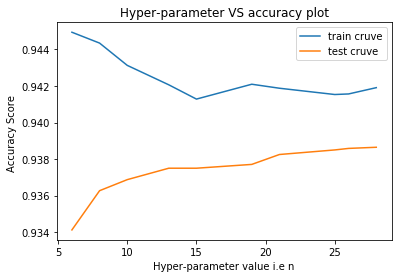

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(neighbors,trainscores, label='train cruve')
plt.plot(neighbors,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel('Hyper-parameter value i.e n')
plt.ylabel('Accuracy Score ')
plt.legend()
plt.show()

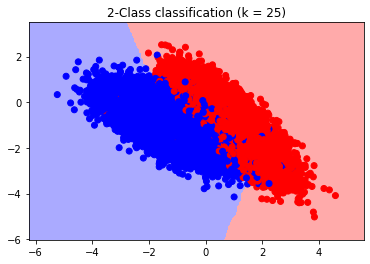

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42) 
  
def plot_decision_boundary(X1, X2, y, clf):
       # Create color maps
   cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
   cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) 
   x_min, x_max = X1.min() - 1, X1.max() + 1
   y_min, y_max = X2.min() - 1, X2.max() + 1
   
   xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max
, 0.02))
   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape) 
   plt.figure()
   plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
   # Plot also the training points
   plt.scatter(X1, X2, c=y, cmap=cmap_bold)
   
   plt.xlim(xx.min(), xx.max())
   plt.ylim(yy.min(), yy.max())
   plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
   plt.show()
    
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 25)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)